<a href="https://colab.research.google.com/github/godwinokorie/3MTT-Capstone-Project---Godwin-Okorie/blob/main/3MTT_Capstone_Project_Godwin_Okorie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"godwinokorie","key":"73b286276cf3ebe81a6f04905ddd354a"}'}

In [ ]:
import os
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d allen-institute-for-ai/CORD-19-research-challenge


Dataset URL: https://www.kaggle.com/datasets/allen-institute-for-ai/CORD-19-research-challenge
License(s): other
100% 18.4G/18.4G [03:45<00:00, 173MB/s]
100% 18.4G/18.4G [03:45<00:00, 87.4MB/s]


In [ ]:
!ls


drive  sample_data


In [9]:
from google.colab import files
files.upload()

Saving country_wise_latest.csv to country_wise_latest.csv
Saving covid_19_clean_complete.csv to covid_19_clean_complete.csv
Saving day_wise.csv to day_wise.csv
Saving full_grouped.csv to full_grouped.csv
Saving worldometer_data.csv to worldometer_data.csv


{'country_wise_latest.csv': b"Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region\r\nAfghanistan,36263,1269,25198,9796,106,10,18,3.5,69.49,5.04,35526,737,2.07,Eastern Mediterranean\r\nAlbania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.0,Europe\r\nAlgeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa\r\nAndorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.6,Europe\r\nAngola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa\r\nAntigua and Barbuda,86,3,65,18,4,0,5,3.49,75.58,4.62,76,10,13.16,Americas\r\nArgentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas\r\nArmenia,37390,711,26665,10014,73,6,187,1.9,71.32,2.67,34981,2409,6.89,Europe\r\nAustralia,15303,167,9311,5825,368,6,137,1.09,60.84,1.79,12428,2875,23.13,Western Pacific\r\nAustria,20558,713,

In [10]:
import os
print(os.listdir('/content'))


['.config', 'day_wise.csv', 'worldometer_data.csv', 'full_grouped.csv', 'country_wise_latest.csv', 'covid_19_clean_complete.csv', 'sample_data']


In [11]:
#import necessary libraries
import pandas as pd # Add this line to import pandas with the alias pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing



In [14]:
df1 = pd.read_csv('country_wise_latest.csv')
df2 = pd.read_csv('covid_19_clean_complete.csv')
df3 = pd.read_csv('day_wise.csv')
df4 = pd.read_csv('full_grouped.csv')
df5 = pd.read_csv('worldometer_data.csv')

***Inspect the datasets to understand their structure. Clean the Data***

In [15]:
# Inspect each dataset
print("Country-wise Latest Data:\n", df1.info(), "\n")
print("COVID-19 Clean Complete Data:\n", df2.info(), "\n")
print("Day-wise Data:\n", df3.info(), "\n")
print("Full Grouped Data:\n", df4.info(), "\n")
print("Worldometer Data:\n", df5.info(), "\n")

# Preview the first few rows of each dataset
print("Country-wise Latest Preview:\n", df1.head(), "\n")
print("Day-wise Data Preview:\n", df3.head(), "\n")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [38]:
# Merge df2 with selected columns from df5
df = df2.merge(df5[['Country/Region', 'Continent', 'Population', 'WHO Region']],
               on='Country/Region', how='left')

# Check if the columns exist
print("Columns in df after merge:", df.columns)

# Drop rows with missing values
if 'WHO Region' in df.columns and 'Date' in df.columns:
    df.dropna(subset=['Continent', 'Population', 'WHO Region', 'Date'], inplace=True)
else:
    print("One or more columns are missing. Check your data.")

# Display the result
df.head()


Columns in df after merge: Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region_x', 'Continent',
       'Population', 'WHO Region_y'],
      dtype='object')
One or more columns are missing. Check your data.


Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active           WHO Region_x Continent  Population  \
0       0          0       0  Eastern Mediterranean      Asia  39009447.0   
1       0          0       0                 Europe    Europe   2877470.0   
2       0          0       0                 Africa    Africa  43926079.0   
3       0          0       0                 Europe    Europe     77278.0   
4       0          0       0                 Africa    Africa  32956300.0   

           WHO Region_y  
0  EasternMediterranean  
1                Europe  
2                Africa  
3                Europe  
4                Africa

In [57]:
 df_fill=df.fillna({
    'NewCases':0,
       'TotalDeaths':0,
    'NewDeaths':0,
    'TotalRecovered':0,
    'NewRecovered':0,
       'ActiveCases':0,
    'Serious,Critical':0,
    'Tot Cases/1M pop':0,
    'Deaths/1M pop':0,
       'TotalTests':0,
    'Tests/1M pop':0, })
df_fill.head()

Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active           WHO Region_x Continent  Population  \
0       0          0       0  Eastern Mediterranean      Asia  39009447.0   
1       0          0       0                 Europe    Europe   2877470.0   
2       0          0       0                 Africa    Africa  43926079.0   
3       0          0       0                 Europe    Europe     77278.0   
4       0          0       0                 Africa    Africa  32956300.0   

           WHO Region_y  
0  EasternMediterranean  
1                Europe  
2                Africa  
3                Europe  
4                Africa

In [58]:
#change date column from object to date
df_fill['Date'] = pd.to_datetime(df_fill['Date'])
df_fill['Date'] = pd.to_datetime(df_fill['Date'], errors='coerce')
df_fill.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
WHO Region_x              object
Continent                 object
Population               float64
WHO Region_y              object
dtype: object

In [59]:
df_fill.duplicated().sum()

0

In [60]:
df_d = df_fill.drop_duplicates()

In [61]:
df_d.duplicated().sum()

0

In [62]:
df_d.shape

(49068, 13)

In [66]:
df_d.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region_x', 'Continent',
       'Population', 'WHO Region_y'],
      dtype='object')

In [67]:
df_d.describe()

Lat          Long                 Date     Confirmed  \
count  49068.000000  49068.000000                49068  4.906800e+04   
mean      21.433730     23.528236  2020-04-24 12:00:00  1.688490e+04   
min      -51.796300   -135.000000  2020-01-22 00:00:00  0.000000e+00   
25%        7.873054    -15.310100  2020-03-08 18:00:00  4.000000e+00   
50%       23.634500     21.745300  2020-04-24 12:00:00  1.680000e+02   
75%       41.204380     80.771797  2020-06-10 06:00:00  1.518250e+03   
max       71.706900    178.065000  2020-07-27 00:00:00  4.290259e+06   
std       24.950320     70.442740                  NaN  1.273002e+05   

              Deaths     Recovered        Active    Population  
count   49068.000000  4.906800e+04  4.906800e+04  3.816400e+04  
mean      884.179160  7.915713e+03  8.085012e+03  3.422684e+07  
min         0.000000  0.000000e+00 -1.400000e+01  3.393800e+04  
25%         0.000000  0.000000e+00  0.000000e+00  3.278650e+06  
50%         2.000000  2.900000e+01  2.600000e+01  1.168846e+07  
75%        30.000000  6.660000e+02  6.060000e+02  3.777502e+07  
max    148011.000000  1.846641e+06  2.816444e+06  1.381345e+09  
std      6313.584411  5.480092e+04  7.625890e+04  1.031766e+08

***Exploratory Data Analysis***

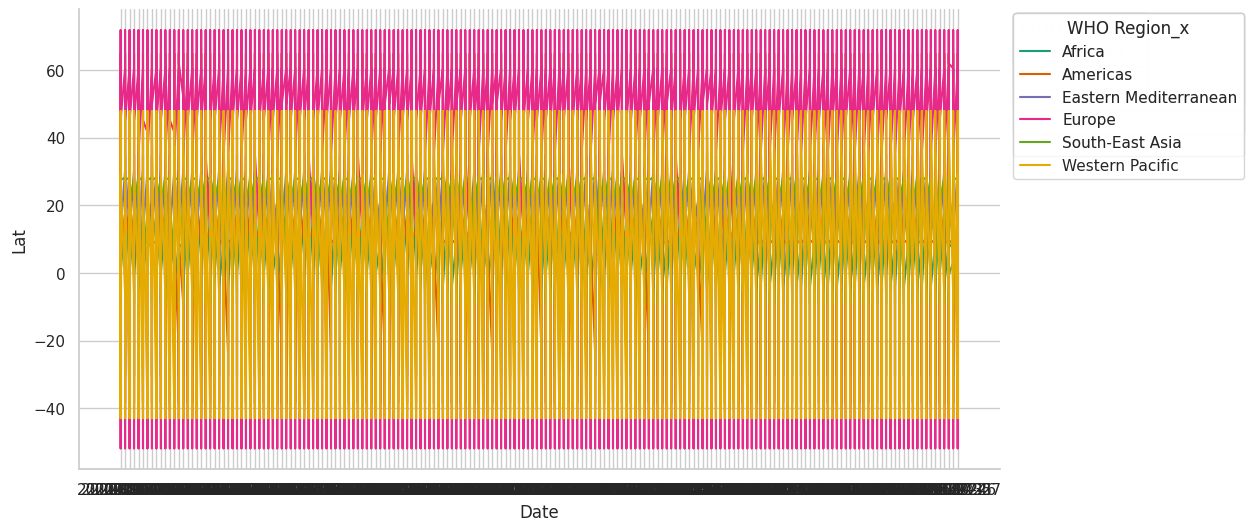

In [54]:
# @title Date vs Lat

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Lat']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('WHO Region_x')):
  _plot_series(series, series_name, i)
  fig.legend(title='WHO Region_x', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Lat')

<ipython-input-55-85601db63ac9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Long', y='WHO Region_x', inner='box', palette='Dark2')


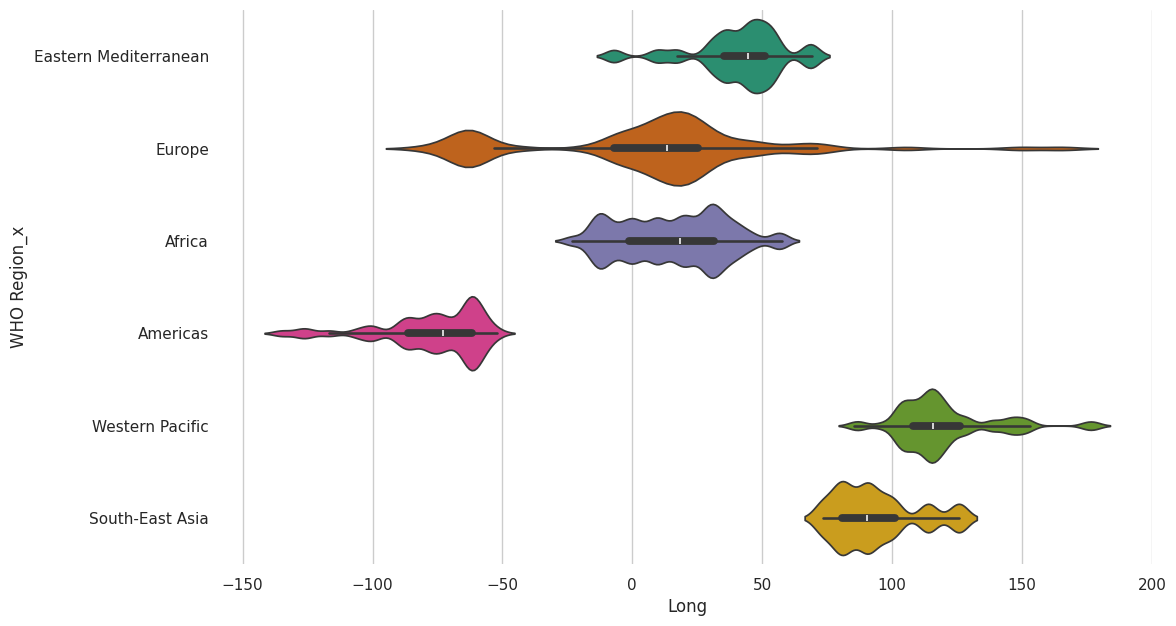

In [55]:
# @title WHO Region_x vs Long

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['WHO Region_x'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Long', y='WHO Region_x', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-53-4678f952a24e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Lat', y='WHO Region_y', inner='box', palette='Dark2')


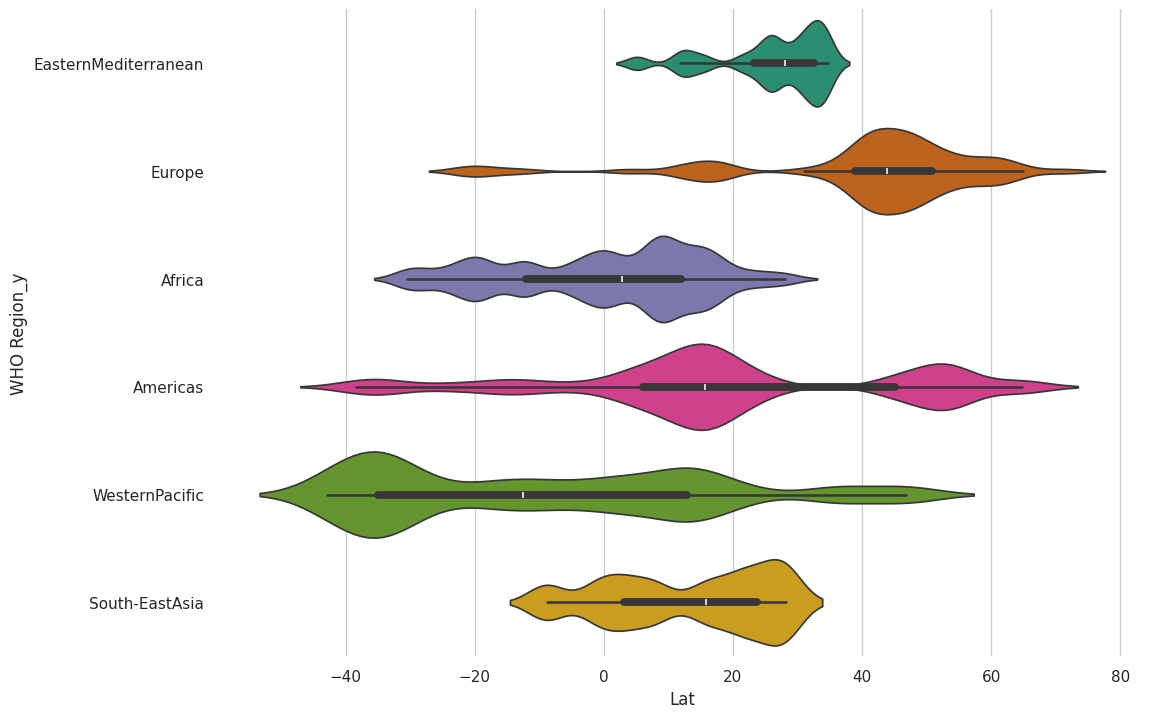

In [53]:
# @title WHO Region_y vs Lat

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['WHO Region_y'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Lat', y='WHO Region_y', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

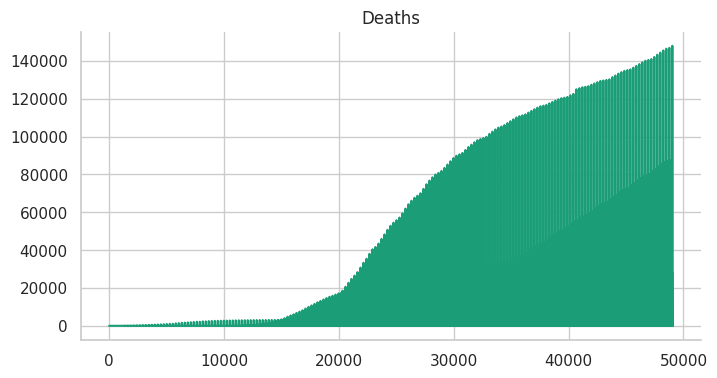

In [52]:
# @title Deaths

from matplotlib import pyplot as plt
df['Deaths'].plot(kind='line', figsize=(8, 4), title='Deaths')
plt.gca().spines[['top', 'right']].set_visible(False)

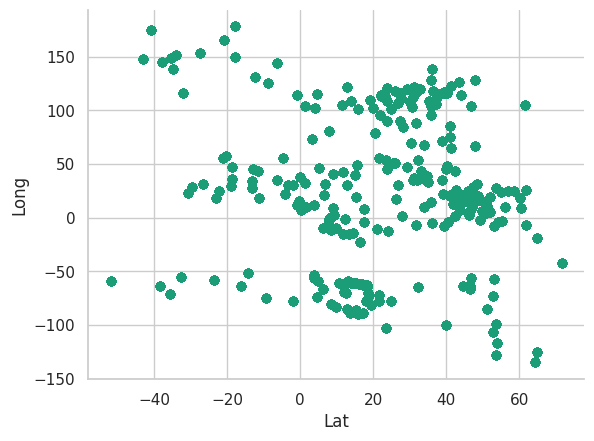

In [51]:
# @title Lat vs Long

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Lat', y='Long', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

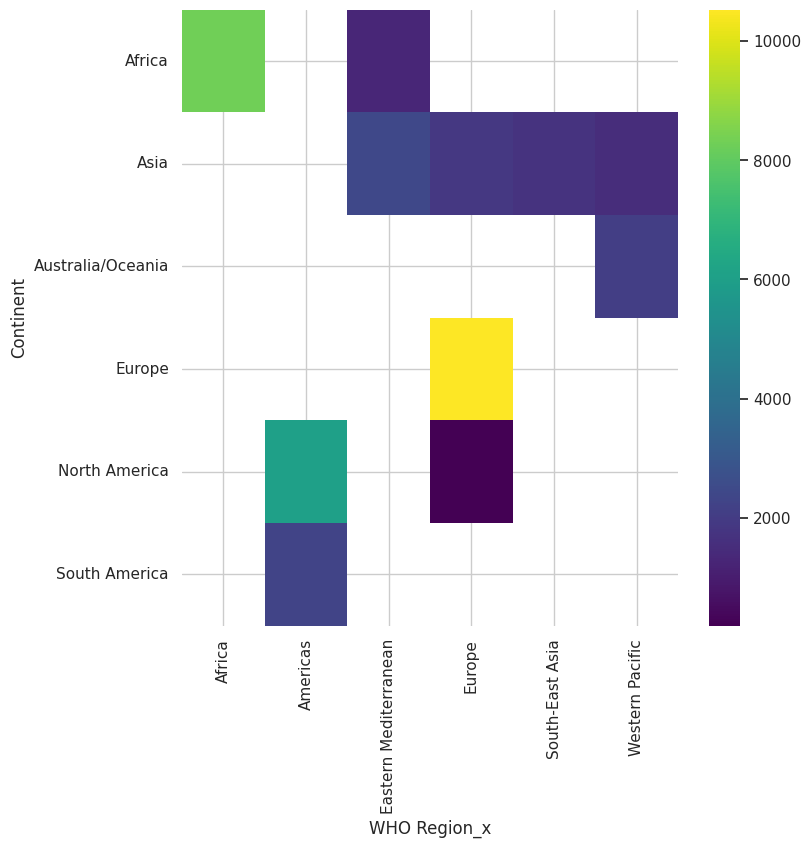

In [50]:
# @title WHO Region_x vs Continent

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Continent'].value_counts()
    for x_label, grp in df.groupby('WHO Region_x')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('WHO Region_x')
_ = plt.ylabel('Continent')

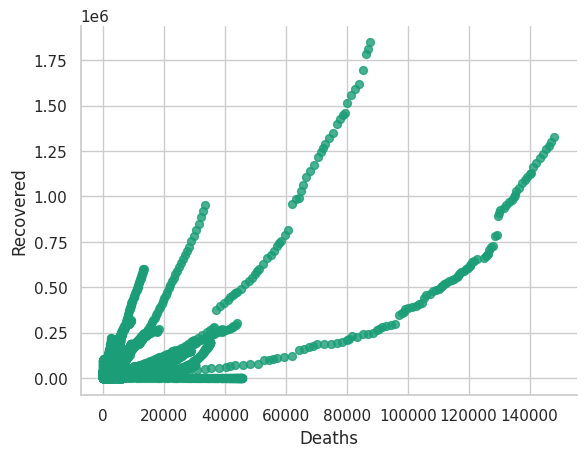

In [49]:
# @title Deaths vs Recovered

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Deaths', y='Recovered', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

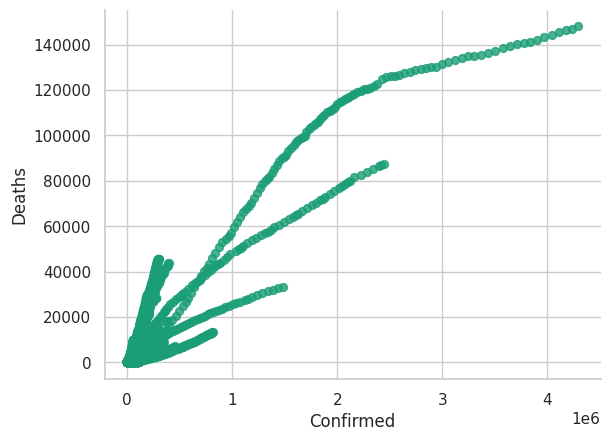

In [48]:
# @title Confirmed vs Deaths

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Confirmed', y='Deaths', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

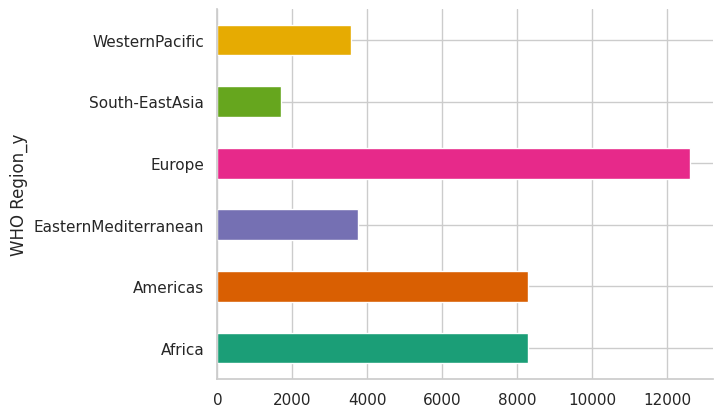

In [47]:
# @title WHO Region_y

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('WHO Region_y').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

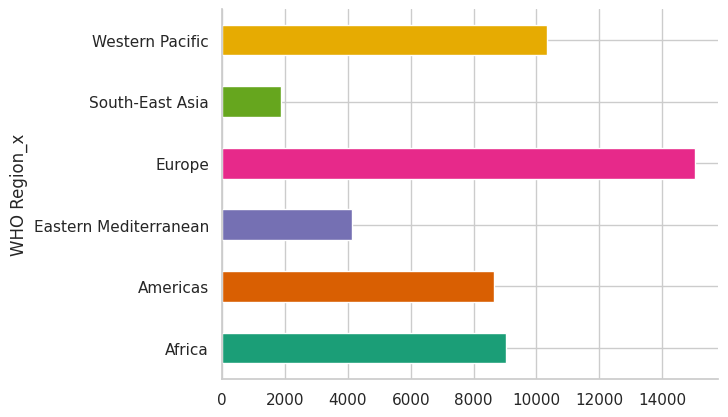

In [46]:
# @title WHO Region_x

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('WHO Region_x').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

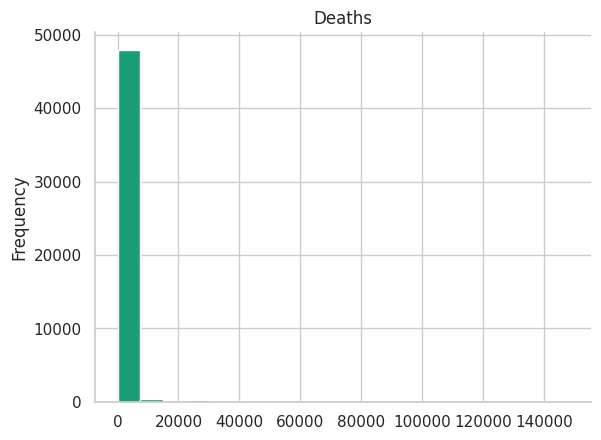

In [45]:
# @title Deaths

from matplotlib import pyplot as plt
df['Deaths'].plot(kind='hist', bins=20, title='Deaths')
plt.gca().spines[['top', 'right',]].set_visible(False)

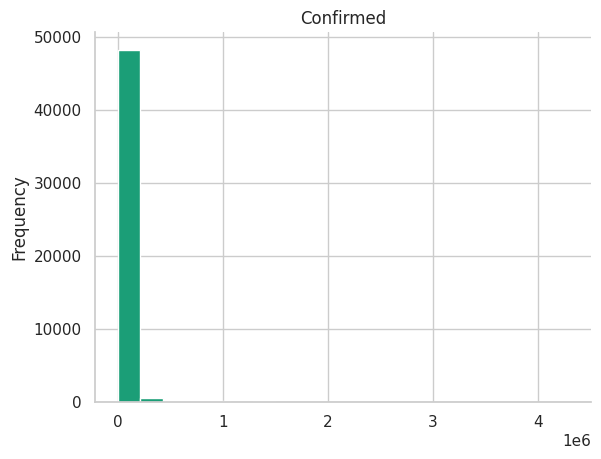

In [44]:
# @title Confirmed

from matplotlib import pyplot as plt
df['Confirmed'].plot(kind='hist', bins=20, title='Confirmed')
plt.gca().spines[['top', 'right',]].set_visible(False)

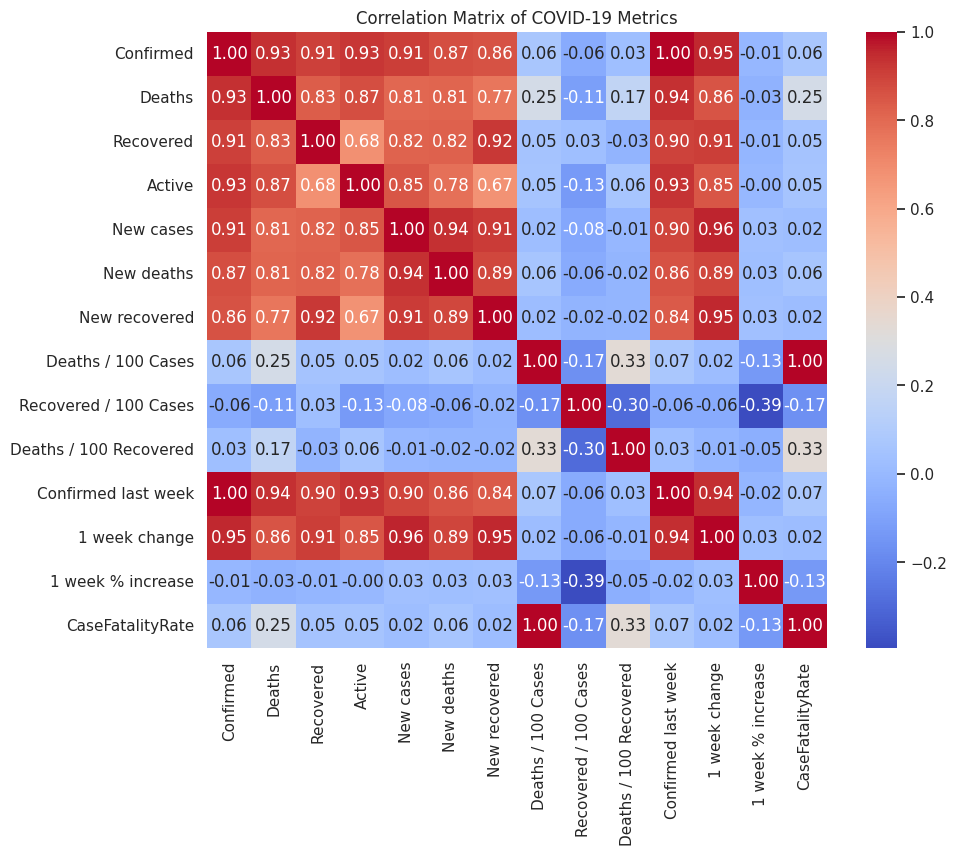

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Import pandas for data manipulation

# Calculate the correlation matrix for numerical columns in df1
# Select only numerical columns using select_dtypes
numerical_df1 = df1.select_dtypes(include=['number'])
correlation_matrix = numerical_df1.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix of COVID-19 Metrics')
plt.show()

In [71]:
# Extract strongly correlated pairs
strong_correlation = correlation_matrix[(correlation_matrix >= 0.7) | (correlation_matrix <= -0.7)]
print(strong_correlation)


                        Confirmed    Deaths  Recovered    Active  New cases  \
Confirmed                1.000000  0.934698   0.906377  0.927018   0.909720   
Deaths                   0.934698  1.000000   0.832098  0.871586   0.806975   
Recovered                0.906377  0.832098   1.000000       NaN   0.818942   
Active                   0.927018  0.871586        NaN  1.000000   0.851190   
New cases                0.909720  0.806975   0.818942  0.851190   1.000000   
New deaths               0.871683  0.814161   0.820338  0.781123   0.935947   
New recovered            0.859252  0.765114   0.919203       NaN   0.914765   
Deaths / 100 Cases            NaN       NaN        NaN       NaN        NaN   
Recovered / 100 Cases         NaN       NaN        NaN       NaN        NaN   
Deaths / 100 Recovered        NaN       NaN        NaN       NaN        NaN   
Confirmed last week      0.999127  0.939082   0.899312  0.931459   0.896084   
1 week change            0.954710  0.855330   0.9100

For Global Trends (df3)
Use the day_wise.csv dataset to analyze cumulative cases and deaths over time.

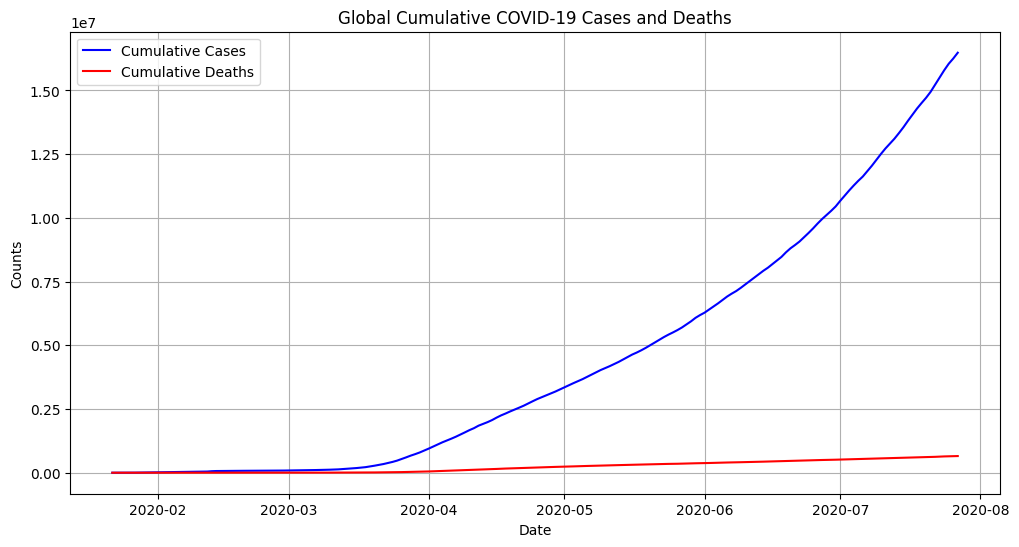

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Date' column to datetime
df3['Date'] = pd.to_datetime(df3['Date'])

# Plot global cumulative cases and deaths
plt.figure(figsize=(12, 6))
sns.lineplot(data=df3, x='Date', y='Confirmed', label='Cumulative Cases', color='blue')
sns.lineplot(data=df3, x='Date', y='Deaths', label='Cumulative Deaths', color='red')
plt.title('Global Cumulative COVID-19 Cases and Deaths')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.legend()
plt.grid(True)
plt.show()


Use the worldometer_data.csv dataset for country-level analysis.

<ipython-input-17-e1430b8a8a8b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x='TotalCases', y='Country/Region', palette='viridis')


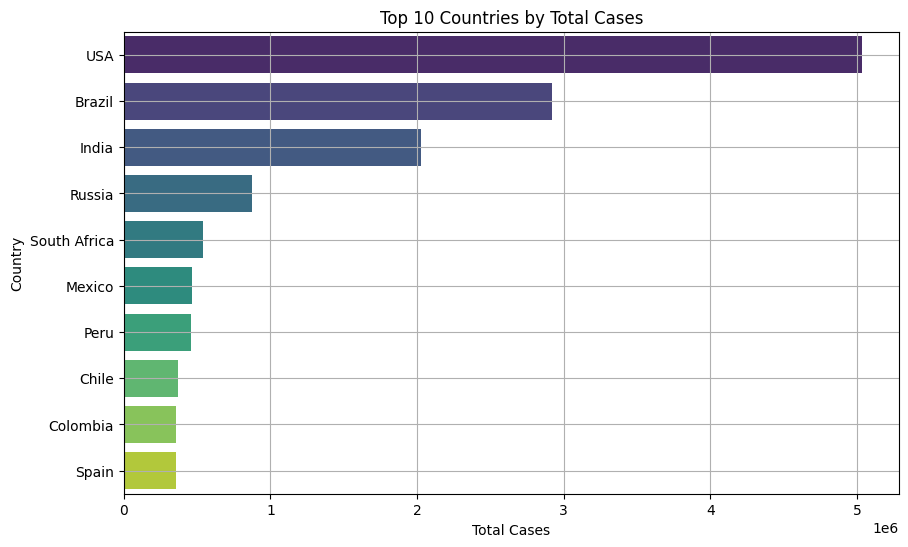

In [17]:
# Filter top 10 countries by total cases
top_countries = df5.nlargest(10, 'TotalCases')

# Bar plot for total cases in top countries
plt.figure(figsize=(10, 6))
sns.barplot(data=top_countries, x='TotalCases', y='Country/Region', palette='viridis')
plt.title('Top 10 Countries by Total Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.grid(True)
plt.show()


Add a Case Fatality Rate (CFR) feature to the country_wise_latest.csv dataset and visualize the top 10 countries by CFR.

<ipython-input-18-c365d36c495e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cfr_countries, x='CaseFatalityRate', y='Country/Region', palette='magma')


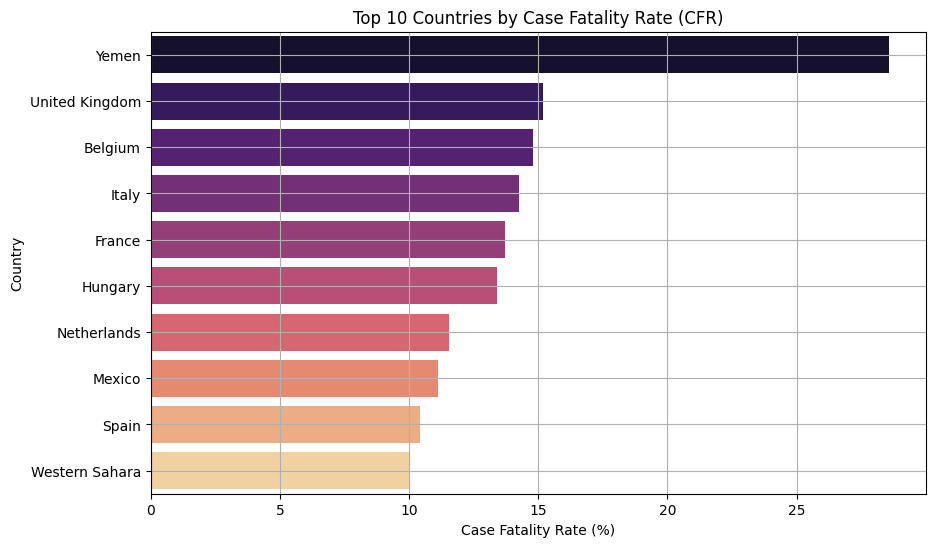

In [18]:
# Calculate Case Fatality Rate
df1['CaseFatalityRate'] = (df1['Deaths'] / df1['Confirmed']) * 100

# Filter top 10 countries by CFR
top_cfr_countries = df1.nlargest(10, 'CaseFatalityRate')

# Bar plot for CFR in top countries
plt.figure(figsize=(10, 6))
sns.barplot(data=top_cfr_countries, x='CaseFatalityRate', y='Country/Region', palette='magma')
plt.title('Top 10 Countries by Case Fatality Rate (CFR)')
plt.xlabel('Case Fatality Rate (%)')
plt.ylabel('Country')
plt.grid(True)
plt.show()


Forecasting Global Cases with ARIMA (df3)
Use the day_wise.csv dataset to forecast global confirmed cases for the next 30 days.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Che

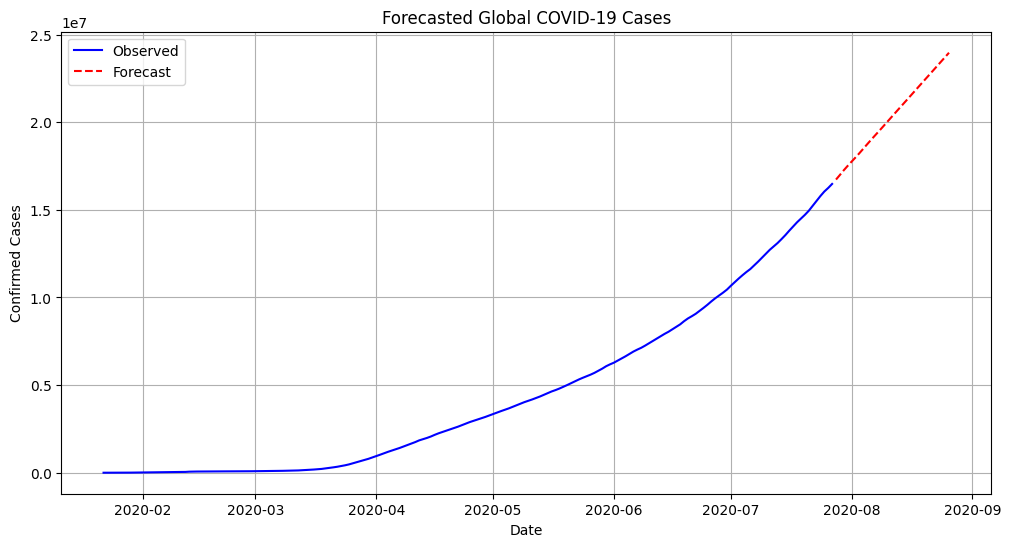

In [19]:
from statsmodels.tsa.arima.model import ARIMA

# Set 'Date' as the index and focus on 'Confirmed'
time_series = df3.set_index('Date')['Confirmed']

# Fit ARIMA model
model = ARIMA(time_series, order=(5, 1, 0))  # Parameters can be tuned
model_fit = model.fit()

# Forecast for the next 30 days
forecast = model_fit.forecast(steps=30)

# Plot observed vs forecasted data
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Observed', color='blue')
plt.plot(forecast, label='Forecast', linestyle='--', color='red')
plt.title('Forecasted Global COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.grid(True)
plt.show()


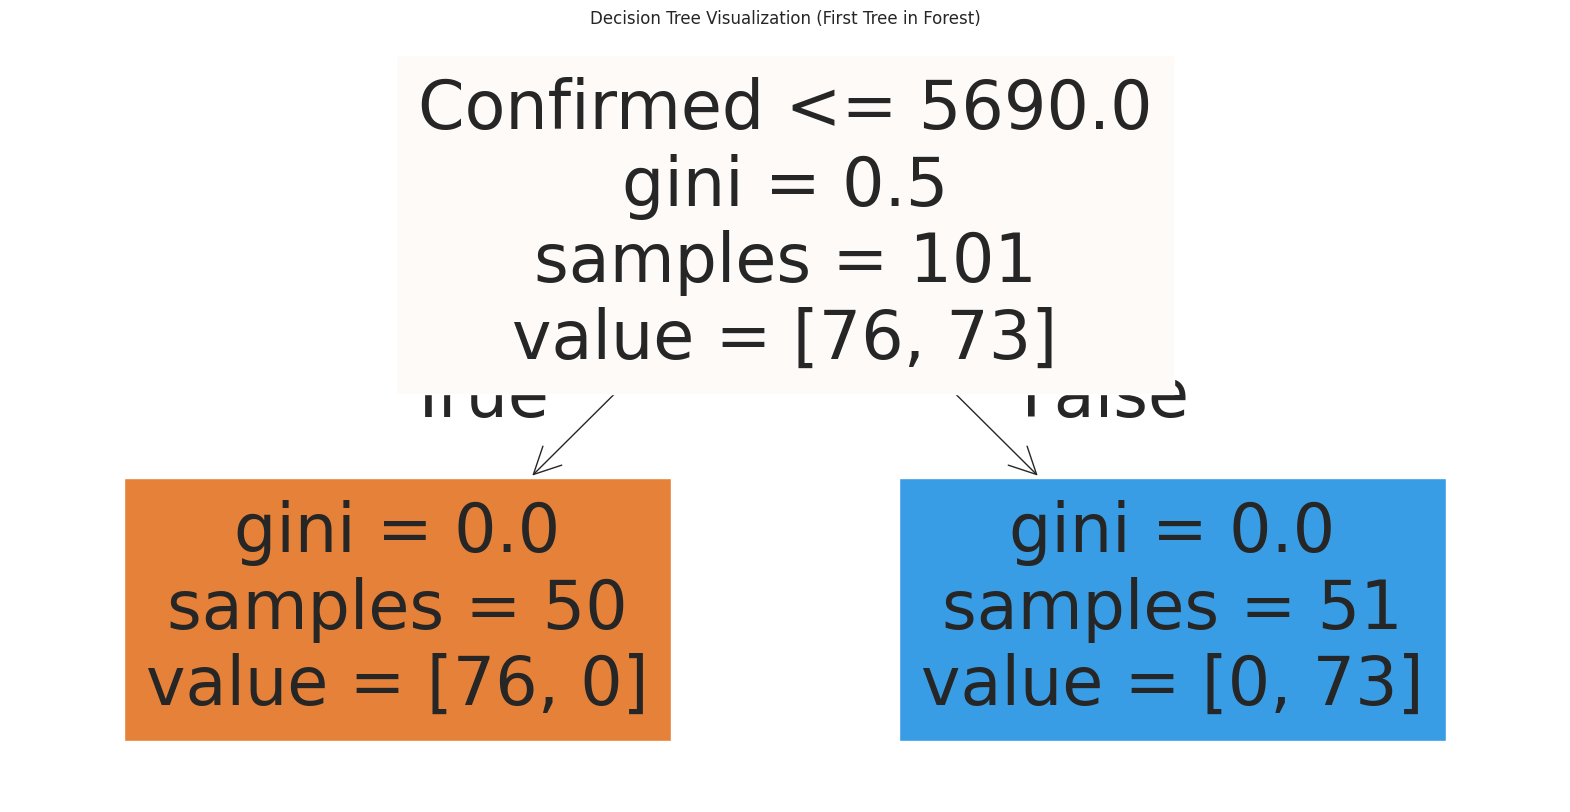

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Visualize the first tree in the forest
plt.figure(figsize=(20, 10))
plot_tree(rf.estimators_[0], filled=True, feature_names=X_train.columns.tolist(), max_depth=3)
plt.title('Decision Tree Visualization (First Tree in Forest)')
plt.show()

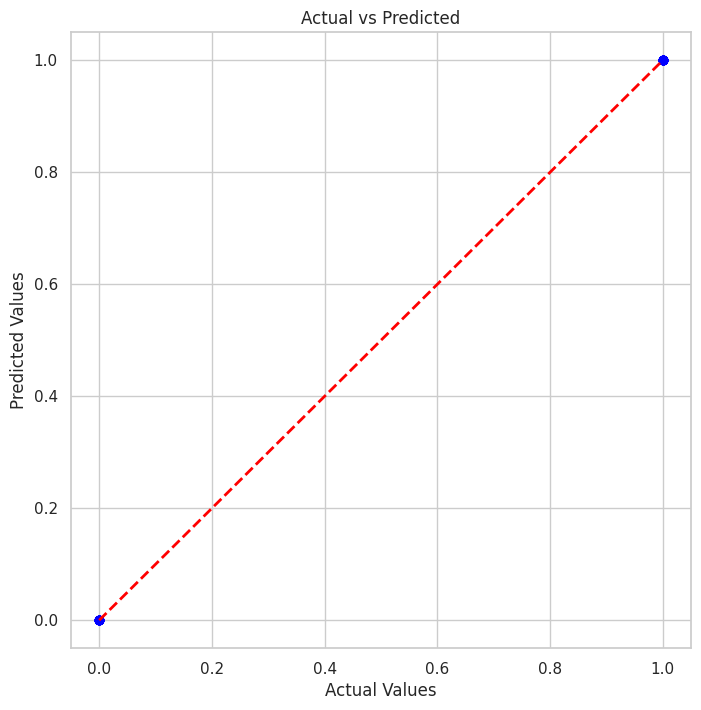

Mean Absolute Error: 0.0


In [73]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# Assuming y_test is the actual values and y_pred is the predicted values
y_pred = rf.predict(X_test)

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

# Print performance metrics
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")

Classify countries into High Severity or Low Severity based on their total cases using a Random Forest Classifier.

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        21

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



<ipython-input-20-907b7538609d>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=X.columns, palette='viridis')


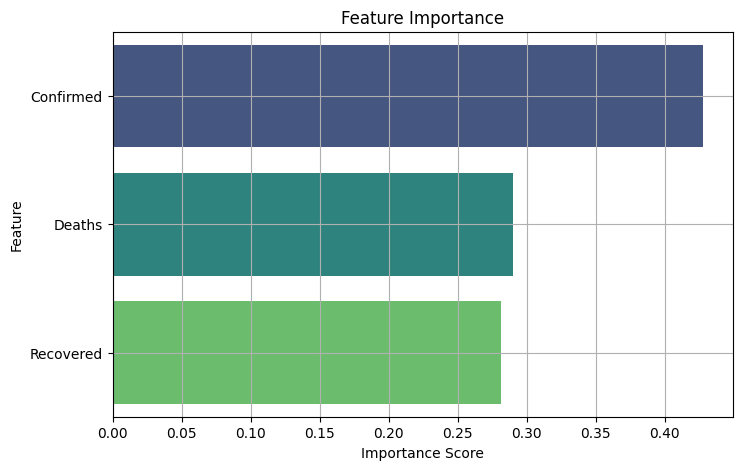

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Define features and target
X = df1[['Confirmed', 'Deaths', 'Recovered']]
y = (df1['Confirmed'] > df1['Confirmed'].median()).astype(int)  # 1: High Severity, 0: Low Severity

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate model
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
feature_importances = rf_model.feature_importances_
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances, y=X.columns, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(True)
plt.show()


Save the processed data and trained models for reuse.

In [21]:
# Save processed datasets
df1.to_csv('processed_country_wise_latest.csv', index=False)
df3.to_csv('processed_day_wise.csv', index=False)

# Save the Random Forest model
import joblib
joblib.dump(rf_model, 'random_forest_model.pkl')
print("Model saved as 'random_forest_model.pkl'")


Model saved as 'random_forest_model.pkl'


Forecast trends for 3 more years.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Che

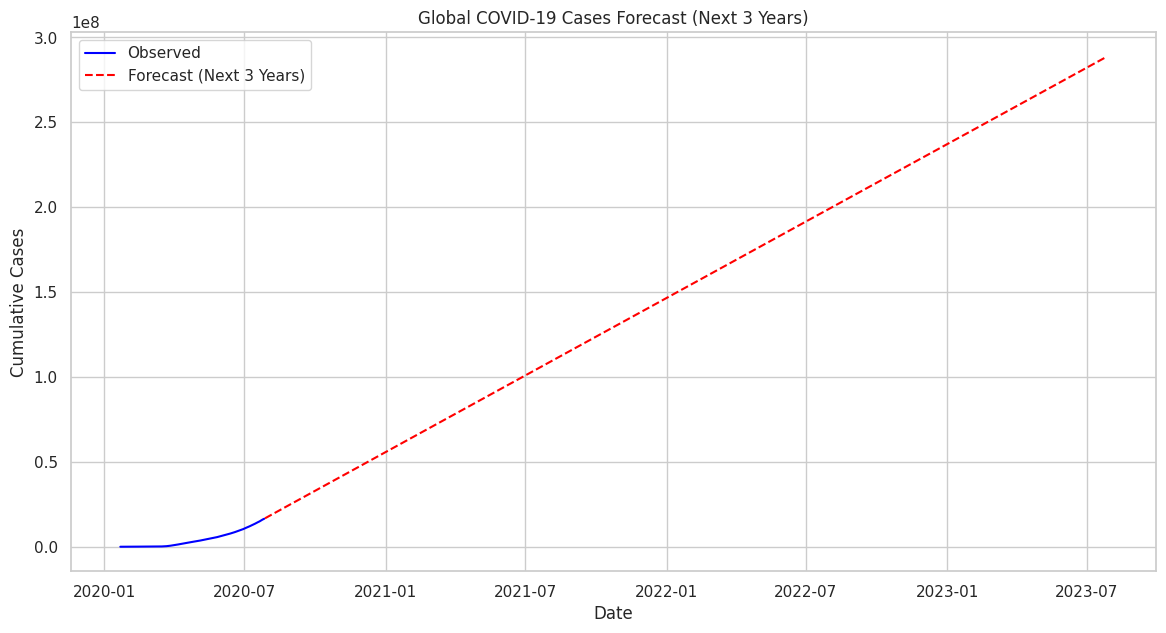

In [56]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Prepare the time-series data
df3['Date'] = pd.to_datetime(df3['Date'])
df3.set_index('Date', inplace=True)
time_series = df3['Confirmed']

# Fit ARIMA model
model = ARIMA(time_series, order=(5, 1, 0))  # Adjust (p, d, q) through tuning
model_fit = model.fit()

# Forecast for the next 1095 days (3 years)
forecast_steps = 1095
forecast = model_fit.forecast(steps=forecast_steps)

# Create a date range for the forecast
import pandas as pd
forecast_dates = pd.date_range(start=time_series.index[-1], periods=forecast_steps + 1, freq='D')[1:]

# Plot observed vs forecasted data
plt.figure(figsize=(14, 7))
plt.plot(time_series, label='Observed', color='blue')
plt.plot(forecast_dates, forecast, label='Forecast (Next 3 Years)', linestyle='--', color='red')
plt.title('Global COVID-19 Cases Forecast (Next 3 Years)')
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.legend()
plt.grid(True)
plt.show()
